In [28]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fisher Information Matrix

## Random Initialization

In [53]:
np.random.seed(42)
x = np.random.uniform(0, np.pi, (100,5))

### Quantum Neural Network

In [61]:
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)

layer1 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend, shots=100000)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=100000)
layers = [layer1, layer2]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [62]:
fim1 = FIM(network)
fim1.fit(x)

In [63]:
print(fim1.fim.shape)

eigen1 = np.linalg.eig(fim1.fim)[0]
eigen1[::-1].sort()
print(eigen1)

(30, 30)
[8.12074235e-03 3.05449358e-03 1.86201596e-03 7.29277213e-04
 6.21828244e-04 3.38300352e-04 3.07676267e-04 1.83083499e-04
 1.30411606e-04 1.22785104e-04 8.66178704e-05 4.91621924e-05
 4.26193535e-05 3.42328588e-05 2.86817561e-05 2.48482499e-05
 1.85403128e-05 1.59603119e-05 1.34756703e-05 1.07527627e-05
 8.66156738e-06 8.32484994e-06 6.13117152e-06 5.14712161e-06
 4.25258807e-06 2.50382582e-06 1.57524384e-06 1.36065176e-06
 6.46792216e-07 3.53258820e-07]


### Classic Neural Network

In [68]:
np.random.seed(42)

layer1 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer2 = Dense(n_features=5, n_targets=1, scale = 1, activation = Identity(), bias=False)
layers =[layer1, layer2]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [69]:
fim2 = FIM(network)
fim2.fit(x)

In [70]:
print(fim2.fim.shape)

eigen2 = np.linalg.eig(fim2.fim)[0]
eigen2[::-1].sort()
print(eigen2)

(30, 30)
[2.01851266e+00 1.31665747e-01 1.05186592e-01 5.46030179e-02
 4.40518814e-02 2.81052775e-02 1.24600738e-02 5.40484853e-03
 4.82320451e-03 2.77245409e-03 1.49682377e-03 1.11320538e-03
 8.66637706e-04 7.60915366e-04 5.78360526e-04 4.91331255e-04
 2.56180203e-04 1.90094252e-04 1.48331649e-04 1.22594852e-04
 6.57018257e-05 5.19085808e-05 4.96386774e-05 3.77806893e-05
 2.74960546e-05 2.21518135e-05 1.10539115e-05 9.26978695e-06
 5.64030413e-06 3.57699793e-06]


### Comparison

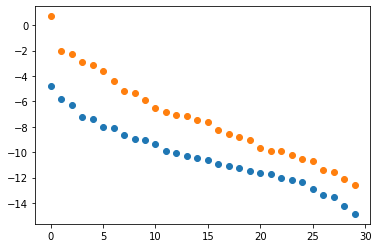

In [71]:
plt.plot(np.log(np.abs(eigen1)), "o")
plt.plot(np.log(np.abs(eigen2)), "o")
plt.show()

In [42]:
print(eigen1)
print(eigen2)

[5.00750016e-02 5.83676724e-03 5.04415623e-03 3.63022000e-03
 2.69382436e-03 1.63691243e-03 1.04291359e-03 8.93120117e-04
 3.58635350e-04 2.46628377e-04 1.46234484e-04 1.20316011e-04
 9.90248623e-05 8.06649400e-05 5.21593597e-05 4.33894973e-05
 2.31504282e-05 1.36073759e-05 8.36183652e-06 4.37046932e-06
 2.35063967e-06 1.31836723e-06 1.14961687e-06 5.19696900e-07
 5.03955057e-07 3.16145095e-07 2.16154384e-07 1.79273252e-07
 1.30482572e-07 8.63250211e-08 5.40611179e-08 4.13926809e-08
 2.68005287e-08 1.17816819e-08 5.37104053e-09]
[ 1.65752079e+00+0.00000000e+00j  2.94575538e-02+0.00000000e+00j
  9.54266287e-04+0.00000000e+00j  3.72531321e-05+0.00000000e+00j
  5.91963051e-07+0.00000000e+00j  4.75509816e-08+0.00000000e+00j
  8.54694161e-10+0.00000000e+00j  1.14452285e-11+0.00000000e+00j
  4.55213845e-13+0.00000000e+00j  7.43228761e-15+0.00000000e+00j
  8.07008576e-17+0.00000000e+00j  1.82361961e-17+0.00000000e+00j
  8.83282312e-18+0.00000000e+00j  3.77729679e-18+1.47493861e-18j
  3.777296